In [127]:
import pandas as pd
import plotly.figure_factory as ff
from lifelines import KaplanMeierFitter
import numpy as np

In [186]:
df = pd.read_csv('Prostate.csv')

In [187]:
columns = ['age_at_index',
    'days_to_birth',
    'days_to_death',
    'ethnicity',
    'gender',
    'race',
    'vital_status',
    'morphology',
    'primary_diagnosis',
    'ajcc_clinical_t',
    'ajcc_clinical_m',
    'ajcc_pathologic_t',
    'ajcc_pathologic_n',
    'primary_gleason_grade',
    'secondary_gleason_grade',
    'prior_malignancy',
    'prior_treatment',
    'site_of_resection_or_biopsy',
    'treatment_type']

In [188]:
df = df[columns]

In [189]:
df['days_to_death'] = np.where(df['vital_status'] == 'Alive' , 4000, df['days_to_death'])
df['days_to_death'] = np.where(df['vital_status'] == 'Not Reported' , 4000, df['days_to_death'])

In [190]:
df['vital_status'].replace({'Dead': 0, 'Alive': 1, 'Not Reported': 1}, inplace=True)

In [208]:
T = df[df['vital_status'] == 0]['days_to_death']
C = df[df['vital_status'] == 0]['vital_status']

In [209]:
kmf = KaplanMeierFitter()

In [210]:
kmf.fit(T, event_observed=C)

/Users/jedrzejkubica/opt/anaconda3/envs/ubrite/lib/python3.10/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 18 total observations, 18 right-censored observations>

In [211]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.0
146.0,1.0
628.0,1.0
728.0,1.0
791.0,1.0
875.0,1.0
1329.0,1.0
1855.0,1.0
2469.0,1.0


<AxesSubplot:xlabel='timeline'>

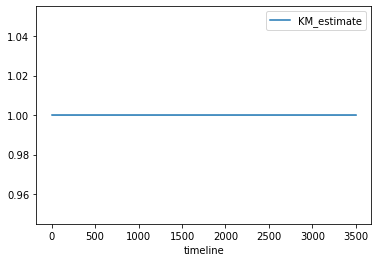

In [212]:
kmf.plot_survival_function()